In [3]:
from mvcl.config import config
from mvcl.model import MetaVisualLearner
from mvcl.primitives import *
from rinarak.domain import Domain, load_domain_string

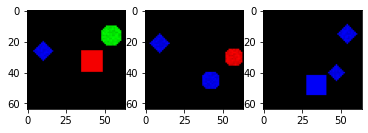

In [9]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from datasets.sprites_base_dataset import SpritesBaseDataset
from datasets.sprites_meta_dataset import SpritesMetaDataset
domain_parser = Domain("mvcl/base.grammar")
meta_domain_str = f"""
(domain meta_demo)
(:type
    object - vector[float,100]
    position - vector[float,2]
    color - vector[float, 64]
    category
)
(:predicate
    color ?x-object -> vector[float,64]
    is-red ?x-object -> boolean
    is-blue ?x-object -> boolean
    is-ship ?x-object -> boolean
    is-house ?x-object -> boolean
)
(:derived
    is-green ?x-color expr: (??f ?x)
)
(:constraint
    (color: is-red is-blue)
    (category: is-ship is-house)
)
"""
domain = load_domain_string(meta_domain_str, domain_parser)
batch_size = 3
base_dataset = SpritesBaseDataset("train")
base_loader = DataLoader(base_dataset, batch_size = batch_size)

# [visualize the datsets, show some samples]
for sample in base_loader: sample;break;
fig = plt.figure("visualize data")
for b in range(batch_size):
    ax = fig.add_subplot(1,batch_size,b+1)
    ax.imshow(sample["img"][b].permute(1,2,0))


In [17]:
# [Create the Demo Model]
model = MetaVisualLearner(domain, config)
model.load_state_dict(torch.load("checkpoints/KFT.pth"))

<All keys matched successfully>

In [18]:
# [Take the Demo dataset sample as input]
ims = sample["img"]
masks = sample["masks"]
outputs = model.perception(ims, masks.long().unsqueeze(1))

In [19]:
all_masks = outputs["masks"]
print(all_masks.shape)

torch.Size([3, 64, 64, 10])
